In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ddos/CICDDoS2019/cicddos2019_dataset.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [ ]:
for i in ["Label", "Class"]:
    df[i] = df[i].astype('category').cat.codes

In [ ]:
def normalize(x, cols):
    result = x.copy() # do not touch the original df
    for feature_name in cols:
        max_value = x[feature_name].max()
        min_value = x[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (x[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_df = pd.DataFrame(normalize(df,df.columns))

In [ ]:
X = normalized_df.drop(columns="Class")
y = df['Class']

trainX, trainT, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
trainX.shape, trainT.shape, y_train.shape, y_test.shape

((345096, 79), (86275, 79), (345096,), (86275,))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model and parameters
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup the grid search
grid = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring='accuracy')
grid.fit(trainX, y_train)

# Output the best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
class_names = ['Dos','Normal']

In [ ]:
predictions = grid.predict(trainT)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Assuming you have test labels y_test and predictions y_pred
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_test, predictions, target_names=class_names)
print(report)

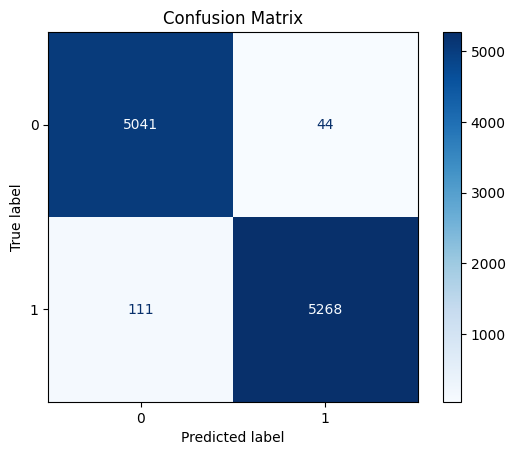

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Assuming you have test labels y_test and predictions y_pred
y_pred = grid.predict(trainT)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


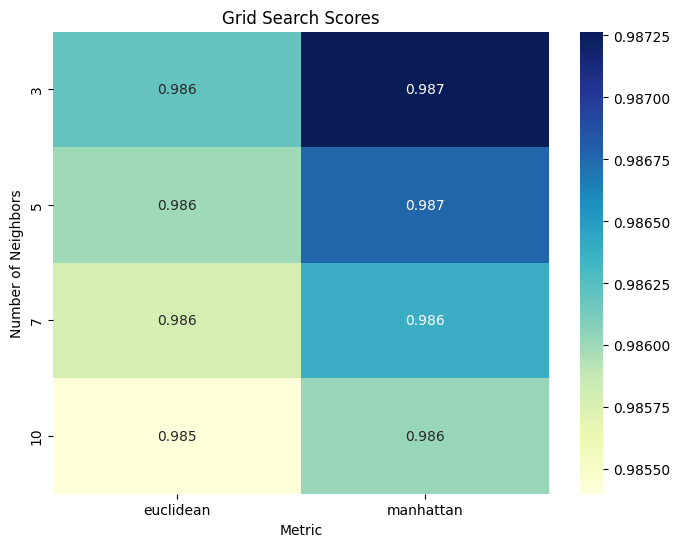

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert GridSearchCV results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Group by parameters and take the mean of scores if duplicates exist
grouped_results = results.groupby(['param_n_neighbors', 'param_metric']).agg({
    'mean_test_score': 'mean'
}).reset_index()

# Create a pivot table for heatmap
pivot_table = grouped_results.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('Metric')
plt.ylabel('Number of Neighbors')
plt.show()

